In [94]:
import os
import os
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline


In [95]:
original_path = '/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2' 

In [96]:
total = 0
for i in os.listdir(original_path):
  pa = os.path.join(original_path, i)
  for m in glob.glob(pa +'/*'):
    if m.split('/')[-2] == 'Cleavers':
      total += 1
print(f'Total images: {total}')

Total images: 335


In [97]:
concat_path = '/content/drive/MyDrive/V2PlantSeedling/all_files'
chk_fld = os.path.isdir(concat_path)

if not chk_fld:
  os.mkdir(concat_path)
  print(f'folder created Successfully: {concat_path}')

else:
  print('Folder already present')

Folder already present


In [ ]:
total = 0
for i in os.listdir(original_path):
  pa = os.path.join(original_path, i)
  for m in glob.glob(pa +'/*'):
    new_name = str(m.split('/')[-2]) + '_' + str(m.split('/')[-1])
    path = os.path.join(concat_path, new_name)
    im_dim = cv2.imread(m)
    cv2.imwrite(path, im_dim)
    total += 1
    print(f'{m}: image uploaded to destination')
print(f'\n--------Total files uploaded: {total}')

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/79.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/8.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/97.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/96.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/81.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/69.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/99.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/84.png: image uploaded to destination
/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2/Common wheat/65.png: image uploaded to destination
/cont

In [ ]:
os.listdir(original_path)

['Cleavers',
 'Common wheat',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Common Chickweed',
 'Fat Hen',
 'Maize',
 'ShepherdGÇÖs Purse',
 'Black-grass',
 'Charlock',
 'Sugar beet',
 'Small-flowered Cranesbill']

In [ ]:
ls ={}
total_images = 0
for root, dirs, files in os.walk(original_path):
  if root.endswith('nonsegmentedv2'):
    pass
  else:
    if root not in ls:
      ls[root] = len(files)
      total_images += len(files)
      #print(len(files),'----',files)

for key,values in ls.items():
  trunc_class = key.split('/')[-1]
  print(f'{trunc_class}: {values}')
print(f'\nTotal Images:- {total_images}')

Cleavers: 335
Common wheat: 253
Loose Silky-bent: 772
Scentless Mayweed: 607
Common Chickweed: 713
Fat Hen: 538
Maize: 257
ShepherdGÇÖs Purse: 274
Black-grass: 309
Charlock: 452
Sugar beet: 463
Small-flowered Cranesbill: 576
.ipynb_checkpoints: 0

Total Images:- 5549


In [98]:
# directory to save all the images
all_im = "/content/drive/MyDrive/all_im_dir"
#os.mkdir(all_im)

In [99]:
all_files_path = '/content/drive/MyDrive/V2PlantSeedling/all_files'
len(os.listdir(all_files_path))

5549

In [100]:
cols = ['file_path', 'target']
lst = []
for f_name in glob.glob(all_files_path + '/*'):
  name = f_name.split('/')[-1]
  class_nm = name.split('_')[0]
  lst.append([f_name,class_nm])

df = pd.DataFrame(lst, columns=cols)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)  

,file_path,target
0,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Maize
1,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Small-flowered Cranesbill
2,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Scentless Mayweed
3,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Loose Silky-bent
4,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Sugar beet
5,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers
6,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Charlock
7,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Scentless Mayweed
8,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Sugar beet
9,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Fat Hen


In [101]:
df.shape

(5549, 2)

(65, 65, 3)


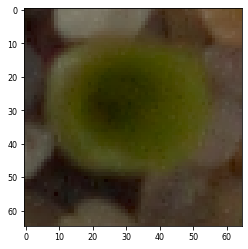

In [102]:
plant_img = imread(df['file_path'][0])
plt.imshow(plant_img)
print(plant_img.shape)

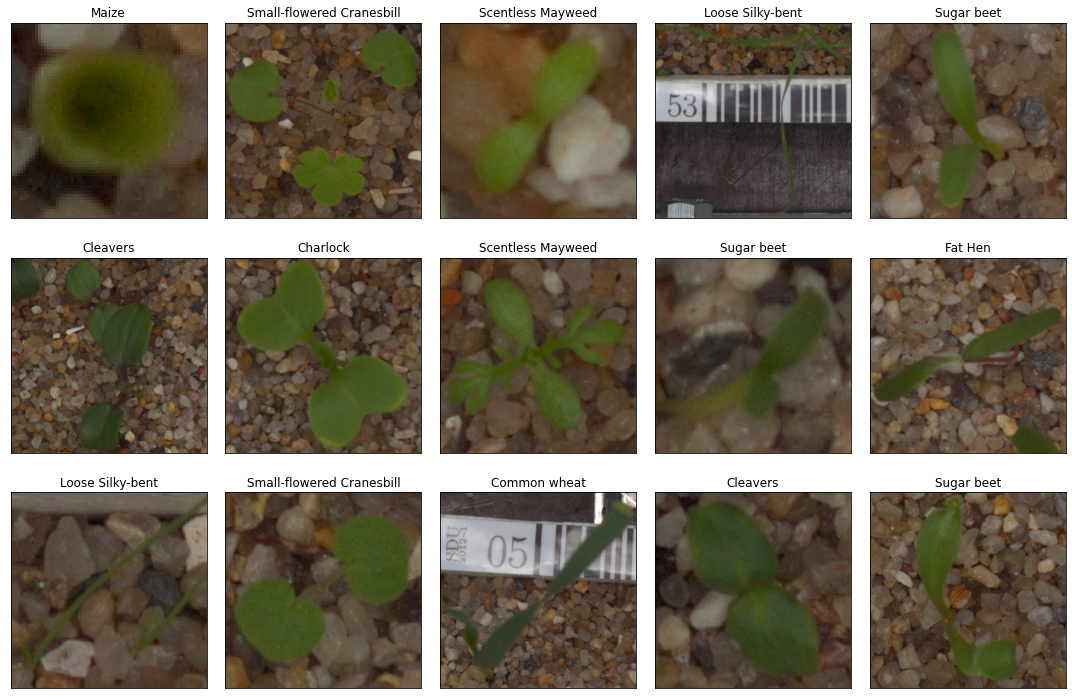

In [103]:

# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.file_path[i]))
    ax.set_title(df.target[i])

plt.tight_layout()
plt.show()

In [104]:
# Balance the class distribution

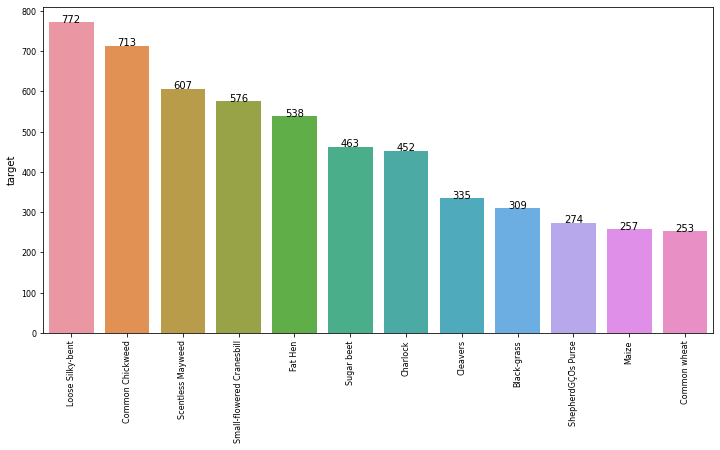

In [105]:
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.barplot(x=df.target.value_counts().index, y=df.target.value_counts())
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['target'].value_counts()[i],ha="center")
    i += 1
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
#df.groupby('target').count()

In [ ]:
"""
dim1 = []
dim2 = []

for im_filename in df['file_path']:
    
    img = imread(im_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
  """

"\ndim1 = []\ndim2 = []\n\nfor im_filename in df['file_path']:\n    \n    img = imread(im_filename)\n    d1,d2,colors = img.shape\n    dim1.append(d1)\n    dim2.append(d2)\n  "

In [ ]:
sns.jointplot(dim1,dim2)

NameError: ignored

Balancing the data distribution for each class

In [106]:
v2seed = os.listdir(original_path)
sample_size = 250

for index, cat in enumerate(v2seed):
  cat = str(cat.strip())
  
  if cat not in ['.ipynb_checkpoints']:
    sample_df = df.loc[df['target'] == cat].sample(n=sample_size,random_state=42)
    print(sample_df.head(1))

    if index == 0:
      final_sampled_df = sample_df

    else:
      final_sampled_df = pd.concat([final_sampled_df, sample_df]).reset_index(drop=True)

display(final_sampled_df.groupby('target').count())
  
final_sampled_df.head()



                                             file_path    target
549  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Cleavers
                                              file_path        target
4549  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Common wheat
                                              file_path            target
3875  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Loose Silky-bent
                                              file_path             target
5133  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Scentless Mayweed
                                             file_path            target
903  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Common Chickweed
                                              file_path   target
5078  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Fat Hen
                                              file_path target
3458  /content/drive/MyDrive/V2PlantSeedling/all_fil...  Maize
                              

,file_path
target,
Black-grass,250
Charlock,250
Cleavers,250
Common Chickweed,250
Common wheat,250
Fat Hen,250
Loose Silky-bent,250
Maize,250
Scentless Mayweed,250


,file_path,target
0,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers
1,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers
2,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers
3,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers
4,/content/drive/MyDrive/V2PlantSeedling/all_fil...,Cleavers


In [107]:
# train_test_split

# stratify=y creates a balanced validation set.
y = final_sampled_df['target']

df_train, df_val = train_test_split(final_sampled_df, test_size=0.10, random_state=42, stratify=y)

print(df_train.shape)
print(df_val.shape)

(2700, 2)
(300, 2)


In [108]:
def make_class_dir(orig_dir_path,data_dir,subfolder):
  for name in os.listdir(orig_dir_path):
    os.mkdir(os.path.join(data_dir,subfolder,name))
    print(f'{name} inside {subfolder} is created...')

In [109]:
data_dir = '/content/drive/MyDrive/V2PlantSeedling/data_dir'
orig_dir_path = '/content/drive/MyDrive/V2PlantSeedling/nonsegmentedv2'
chk_fld = os.path.isdir(data_dir)

if not chk_fld:
  os.mkdir(data_dir)
  print(f'created folder: {data_dir}\n')

  for subfolder in ['train_dir', 'val_dir']:
    os.mkdir(os.path.join(data_dir, subfolder))
    print(f'{subfolder} subdirectory created')
    make_class_dir(orig_dir_path, data_dir, subfolder)
    
else:
  folder_nm = data_dir.split('/')[-1]
  print(f'{folder_nm} folder already exists')

data_dir folder already exists


In [ ]:
pip install shutils

     |████████████████████████████████| 51kB 2.2MB/s 
  Created wheel for shutils: filename=shutils-0.1.0-cp37-none-any.whl size=3517 sha256=637c9940999123ac5d31446030858decb48575640e0dfeeec24539bc741ba3ae
  Stored in directory: /root/.cache/pip/wheels/ab/d0/0e/613976a1b51b5654859e2a82ade64329859bce431e280f2a39
Successfully built shutils


In [112]:
final_sampled_df['file_path'].values[0]

'/content/drive/MyDrive/V2PlantSeedling/all_files/Cleavers_339.png'

In [125]:
# The images will all be resized to this size.
img_size = 95

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'train_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      train = df_train['file_path'][df_train['file_path'].astype(str).str.contains(filter)].values

      for i in train:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
      
        # save the image at the destination
        tr_f_nm = i.split('_')[-1]
        tr_path = os.path.join(root,tr_f_nm)
        #print(tr_path)

        cv2.imwrite(tr_path, image)
        print(f'Base Folder: train_dir; Sub Floder:{filter}; Uploaded File: {tr_f_nm}')


Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 140.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 57.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 124.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 91.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 63.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 319.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 325.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 22.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 62.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 1.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 298.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 31.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 129.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 176.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded Fi

In [133]:
pth = '/content/drive/MyDrive/V2PlantSeedling/data_dir/train_dir/'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Cleavers:- 225

Common wheat:- 225

Loose Silky-bent:- 225

Scentless Mayweed:- 225

Common Chickweed:- 225

Fat Hen:- 225

Maize:- 225

ShepherdGÇÖs Purse:- 225

Black-grass:- 225

Charlock:- 225

Sugar beet:- 225

Small-flowered Cranesbill:- 225

.ipynb_checkpoints:- 0

Total images: 2700


In [135]:
# For testing folder 

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'val_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      val = df_val['file_path'][df_val['file_path'].astype(str).str.contains(filter)].values
      
      for i in val:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
        
        # save the image at the destination
        val_f_nm = i.split('_')[-1]
        val_path = os.path.join(root,val_f_nm)
        #print(val_path)
        cv2.imwrite(val_path, image)
        print(f'Base Folder: train_dir; Sub Floder:{filter}; Uploaded File: {val_f_nm}')


Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 67.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 101.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 191.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 348.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 303.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 81.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 274.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 60.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 38.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 315.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 6.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 157.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 147.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded File: 167.png
Base Folder: train_dir; Sub Floder:Cleavers; Uploaded 

In [136]:
pth = '/content/drive/MyDrive/V2PlantSeedling/data_dir/val_dir/'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Cleavers:- 25

Common wheat:- 25

Loose Silky-bent:- 25

Scentless Mayweed:- 25

Common Chickweed:- 25

Fat Hen:- 25

Maize:- 25

ShepherdGÇÖs Purse:- 25

Black-grass:- 25

Charlock:- 25

Sugar beet:- 25

Small-flowered Cranesbill:- 25

.ipynb_checkpoints:- 0

Total images: 300
